In [1]:
import Pkg; Pkg.activate(@__DIR__); Pkg.instantiate()

  Activating environment at `~/Documents/optimal_control_julia/lec_3/Project.toml`


In [2]:
using LinearAlgebra
using ForwardDiff
using Plots 
# using PyPlot => Sucks

In [3]:
function pendulum_dynamics_wo_control(x)

    g = 9.81
    l = 1
    
    θ = x[1]
    θ̇ = x[2]
    θ̈ = -(g/l) * sin(θ)

    return [θ̇ , θ̈ ]
end

pendulum_dynamics_wo_control (generic function with 1 method)

In [4]:
function backward_euler_step_fixed_point(fun, x0, h)

    xn = x0
    e = [ norm(x0 + h .* fun(xn) - xn) ]

    while e[end] > 1e-8
        xn = x0 + h .* fun(xn)
        e = [e; norm(x0 + h .* fun(xn) - xn) ]
    end

    return xn, e
end

backward_euler_step_fixed_point (generic function with 1 method)

In [5]:
x0 = [0.1, 0.0]
backward_euler_step_fixed_point(pendulum_dynamics_wo_control, x0, 0.1)

([0.09107763941118674, -0.08922369099911744], [0.09793658173053843, 0.009793658173053846, 0.009564124766684667, 0.0009564124766684723, 0.0009343853483241293, 9.343853483241571e-5, 9.128296581455142e-5, 9.128296581450979e-6, 8.917746787032166e-6, 8.917746786990532e-7, 8.712050176828967e-7, 8.712050177106523e-8, 8.511098474606182e-8, 8.511098478769519e-9])

In [6]:
function backward_euler_step_newton(fun, x0, h)

    xn = x0
    r = x0 + h .* fun(xn) - xn
    e = [norm(r)]

    while e[end] > 1e-8
        ∂r = ForwardDiff.jacobian(x -> x0 + h .* fun(x) - x, xn)
        xn = xn - ∂r\r
        r = x0 + h .* fun(xn) - xn
        e = [e; norm(r)]
    end

    return xn, e
end

backward_euler_step_newton (generic function with 1 method)

In [7]:
x0 = [0.1, 0.0]
backward_euler_step_newton(pendulum_dynamics_wo_control, x0, 0.1)

([0.09107763165756541, -0.08922368342434606], [0.09793658173053843, 3.7830087232931797e-6, 5.2874553670659e-15])

In [8]:
function backward_euler_fixed_point(fun, x0, Tf, h)
    t = Array(range(0,Tf,step=h))
    
    x_hist = zeros(length(x0),length(t))
    x_hist[:,1] .= x0
    
    for k = 1:(length(t)-1)
        x_hist[:,k+1], e = backward_euler_step_fixed_point(fun, x_hist[:,k], h)
    end
    
    return x_hist, t
end

backward_euler_fixed_point (generic function with 1 method)

In [9]:
function backward_euler_newton(fun, x0, Tf, h)
    t = Array(range(0,Tf,step=h))
    
    hist = zeros(length(x0), length(t))
    hist[:,1] .= x0

    for i in 1:(length(t) - 1)
        hist[:,i+1], e = backward_euler_step_newton(fun, hist[:,i], h)
    end

    return hist, t
end

backward_euler_newton (generic function with 1 method)

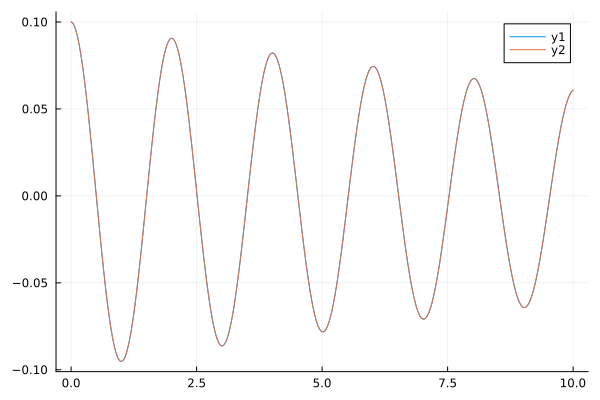

In [10]:
x0 = [.1; 0]
x_hist1, t_hist1 = backward_euler_fixed_point(pendulum_dynamics_wo_control, x0, 10, 0.01)
x_hist2, t_hist2 = backward_euler_newton(pendulum_dynamics_wo_control, x0, 10, 0.01)
Plots.plot(t_hist1, x_hist1[1,:])
Plots.plot!(t_hist2, x_hist2[1,:])

In [35]:
# max.( abs.()... )
maximum([abs.(x_hist1 - x_hist2)...])

7.3007510554383426e-6

In [16]:
x0 = [.1; 0]
xn, e1 = backward_euler_step_fixed_point(pendulum_dynamics_wo_control, x0, 0.1)

([0.09107763941118674, -0.08922369099911744], [0.09793658173053843, 0.009793658173053846, 0.009564124766684667, 0.0009564124766684723, 0.0009343853483241293, 9.343853483241571e-5, 9.128296581455142e-5, 9.128296581450979e-6, 8.917746787032166e-6, 8.917746786990532e-7, 8.712050176828967e-7, 8.712050177106523e-8, 8.511098474606182e-8, 8.511098478769519e-9])

In [17]:
x0 = [.1; 0]
xn, e2 = backward_euler_step_newton(pendulum_dynamics_wo_control, x0, 0.1)

([0.09107763165756541, -0.08922368342434606], [0.09793658173053843, 3.7830087232931797e-6, 5.2874553670659e-15])

## Log-Log Plot

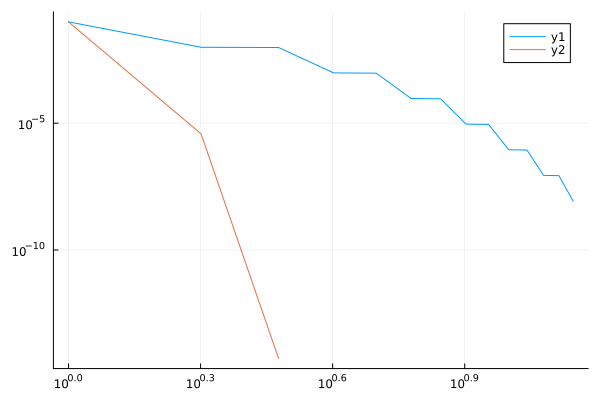

In [23]:
Plots.plot(e1, xaxis=:log, yaxis=:log)
Plots.plot!(e2, xaxis=:log, yaxis=:log)